In [1]:
import os
import cv2
import glob
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
!pip install keras-segmentation

In [3]:
from keras_segmentation.models.unet import vgg_unet

Using TensorFlow backend.


## Visualize images

In [4]:
path = Path('../../../../datasets/camvid')

In [5]:
label_path = path / 'codes.txt'
valid_path = path / 'valid.txt'

In [6]:
labels = np.loadtxt(label_path, dtype=str)
val_files = np.loadtxt(valid_path, dtype=str)

labels

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [7]:
get_y_fn = lambda x: path/'labels/{0}_P{1}'.format(x.stem, x.suffix)

In [8]:
img_paths = [
    '0001TP_006690.png',
    '0016E5_00570.png',
    '0016E5_08047.png',
    'Seq05VD_f03540.png',
    'Seq05VD_f03540.png',
    'Seq05VD_f04560.png'
]

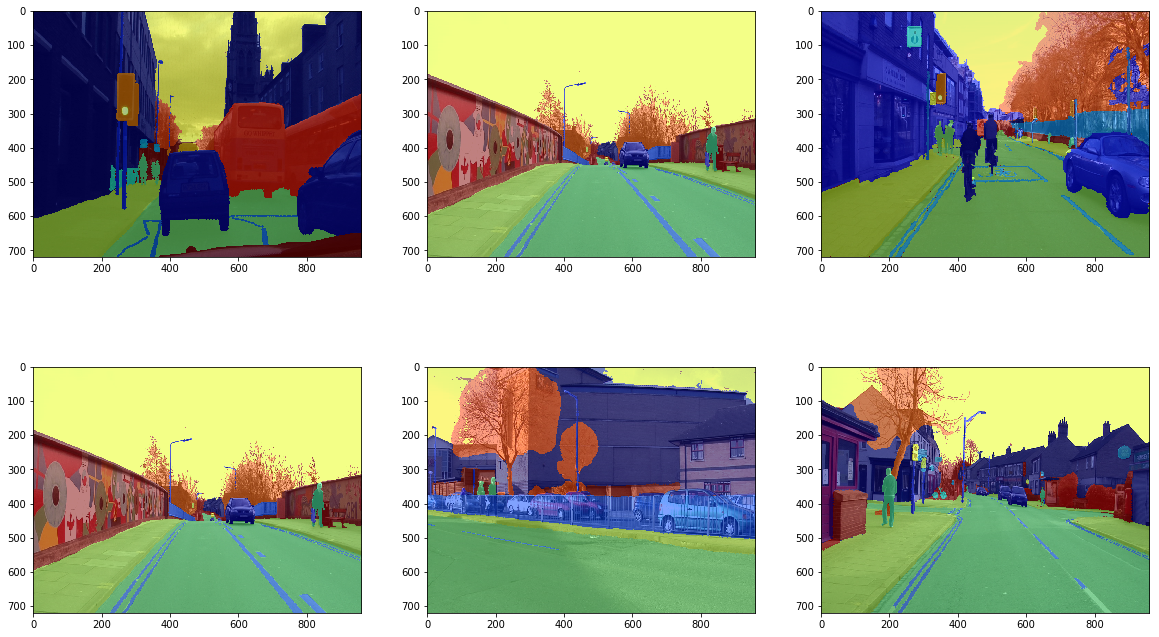

In [9]:
c_map = 'jet'

fig, ax = plt.subplots(2, 3, figsize=(20, 12))

for i in range(len(img_paths)):
    img_path = path / 'images' / img_paths[i]
    lb_path = get_y_fn(img_path)
    img = Image.open(img_path, 'r')
    lb = Image.open(lb_path, 'r')

    ax[i%2][i%3].imshow(np.asarray(img))
    ax[i%2][i%3].imshow(np.asarray(lb), cmap=c_map, alpha=0.5)

In [14]:
model = vgg_unet(n_classes=len(labels), input_height=704, input_width=960)

model.train(
    train_images='train/images',
    train_annotations='train/labels',
    checkpoints_path='/tmp/vgg_unet_1',
    epochs=5
)

out = model.predict_segmentation(
    inp=str(path/'test/images/0016E5_07959.png'),
    out_fname='/tmp/out.png'
)

import matplotlib.pyplot as plt
plt.imshow(out)

# evaluating the model 
print(model.evaluate_segmentation(inp_images_dir=str(path/'test/images'), annotations_dir=str(path/'test/labels')))

  1%|          | 7/600 [00:00<00:09, 62.22it/s]

Verifying training dataset


100%|██████████| 600/600 [00:09<00:00, 62.10it/s]


Dataset verified! 
Epoch 1/5


NotFoundError:  Failed to find conv algorithm!
	 [[node block1_conv2_3/convolution (defined at /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_15214]

Function call stack:
keras_scratch_graph
